# Just some exploritory data analysis of the generated tRNA data. 
I am practicing my data preprocessing skills learned in Jeff Heaton's course 

In [121]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv("organism_tRNAs.csv", names=['fasta_accession','tRNA_num','begin','end','length','isotype','anticodon','score','sequence','ss'])
df = df[['fasta_accession', 'length', 'isotype', 'anticodon', 'score', 'sequence', 'ss']]

In [38]:
df_worthy = df[df['score'] > 74]
print( f'Data with shitty calls: {df.shape[0]}' )
print( f'Data with scores > 74 calls: {df_worthy.shape[0]}\n' )
print( f'Filtered away {df.shape[0] - df_worthy.shape[0]} tRNAs' )
display( df_worthy.head() )

Data with shitty calls: 22709
Data with scores > 74 calls: 15873

Filtered away 6836 tRNAs


,fasta_accession,length,isotype,anticodon,score,sequence,ss
6,NC_004545.1,74,Arg,ACG,75.1,GCATCCGTAGTTCAGTTGGAtAGAGCACTCGGCTACGAACCGAGAGGtCGGAGGTTCAAATCCTTCCGGATGCA,>>>>>>>..>>>>.........<<<<.>>>>>.......<<<<<.....>>>>>.......<<<<<<<<<<<<.
8,NC_004545.1,73,Ile2,CAT,75.0,GGCCTCTTAGCTCAGTGGTaAGAGCAGGCGACTCATAATCGCTTGGtCGCTGGTTCAAATCCAGCAGGGGCCA,>>>>>>>..>>>>........<<<<.>>>>>.......<<<<<.....>>>>>.......<<<<<<<<<<<<.
9,NC_004545.1,73,Gly,GCC,77.6,GCGGGAATAGCTCAGTTGGTAGAGTACAACCTTGCCAAGGTTGGGGtCGCGAGTTCAAATCTCGTTTCCCGCT,>>>>>>>..>>>>........<<<<.>>>>>.......<<<<<.....>>>>>.......<<<<<<<<<<<<.
11,NC_004545.1,74,Arg,CCG,76.0,GCGCTTGTAGCTCAGTTGGAtAGAGCGCTACCCTCCGAAGGTAGAGGcCTCAGGTTCGAATCCTGTCAAGCGCA,>>>>>>>..>>>>.........<<<<.>>>>>.......<<<<<......>>>>.......<<<<.<<<<<<<.
13,NC_004545.1,74,Pro,TGG,74.4,CGGCGAGTAGCGCAGTTtGGTAGCGCAACTGGTTTGGGACCAGTAGGtCAGAGGTTCAAATCCTCTCTCGCCGA,>>>>>>>..>>>>.........<<<<.>>>>>.......<<<<<.....>>>>>.......<<<<<<<<<<<<.


In [39]:
score_median = df_worthy['score'].median()
score_25 = df_worthy['score'].quantile(0.25)
score_75 = df_worthy['score'].quantile(0.75)
score_min = df_worthy['score'].min()
score_max = df_worthy['score'].max()

print(score_median, score_25, score_75, score_min, score_max)

82.4 78.4 85.5 74.1 144.6


In [47]:
isotypes = {'Asn', 'Pro', 'Ile', 'Gln', 'Ser', 'Phe', 'Met', 'His', 'Asp', 'Tyr', 'Ile2', 'Ala', 'fMet', 'Lys', 'Val', 'Thr', 'SeC', 'Arg', 'Trp', 'Leu', 'Gly'}

# Lets see the distribution of scores for each isotype just for fun :P

In [50]:
global_score_dist = {'min':score_min, '25th':score_25, 'median':score_median, '75th':score_75, 'max':score_max}

In [75]:
isotype_score_dist = {key:{'min':0, '25th':0, 'median':0, '75th':0, 'max':0} for key in isotypes}

score_iso_median = df_worthy.groupby('isotype')['score'].median()
score_iso_25 = df_worthy.groupby('isotype')['score'].quantile(0.25)
score_iso_75 = df_worthy.groupby('isotype')['score'].quantile(0.75)
score_iso_min = df_worthy.groupby('isotype')['score'].min()
score_iso_max = df_worthy.groupby('isotype')['score'].max()
score_iso_counts = df_worthy.groupby('isotype')['score'].count()

In [122]:
df_score_summary = pd.concat([score_iso_min, score_iso_25, score_iso_median, score_iso_75, score_iso_max, score_iso_counts], axis=1)
df_score_summary.columns = ['score_min', 'score_25', 'score_median', 'score_75', 'score_max', 'score_count']
df_score_summary = df_score_summary.transpose()
df_score_summary

isotype,Ala,Arg,Asn,Asp,Gln,Gly,His,Ile,Ile2,Leu,Lys,Met,Phe,Pro,SeC,Ser,Thr,Trp,Tyr,Val,fMet
score_min,74.2,74.3,74.3,75.2,74.8,74.6,74.1,74.8,74.200,74.100,74.3,74.9,74.8,74.1,78.60,74.1,74.4,75.6,74.3,74.3,74.1
score_25,75.0,82.9,79.7,83.8,75.9,88.4,77.6,75.8,80.925,74.100,93.0,82.9,75.3,82.4,133.90,77.1,79.8,79.9,74.7,82.5,77.5
score_median,77.4,84.0,79.7,85.5,77.0,88.4,77.6,75.8,82.700,76.000,94.9,82.9,75.3,82.4,137.95,83.4,82.2,80.8,74.7,84.6,77.5
score_75,80.9,85.1,79.7,87.4,77.1,88.4,77.6,75.8,85.100,78.425,94.9,83.9,75.4,82.4,141.30,84.8,85.1,80.8,74.8,84.6,77.5
score_max,84.5,95.1,85.1,91.3,77.2,89.6,78.7,85.1,88.300,80.000,97.2,86.9,84.1,83.2,144.60,91.6,91.4,83.6,78.9,92.2,82.2
score_count,1011.0,1578.0,1036.0,814.0,3.0,1330.0,278.0,525.0,298.000,602.000,1416.0,574.0,505.0,557.0,176.00,1188.0,1079.0,286.0,50.0,1678.0,889.0


In [123]:
# Table where the counts are more than 1000
df_score_summary.transpose()[df_score_summary.transpose()['score_count'] > 1000].transpose()

isotype,Ala,Arg,Asn,Gly,Lys,Ser,Thr,Val
score_min,74.2,74.3,74.3,74.6,74.3,74.1,74.4,74.3
score_25,75.0,82.9,79.7,88.4,93.0,77.1,79.8,82.5
score_median,77.4,84.0,79.7,88.4,94.9,83.4,82.2,84.6
score_75,80.9,85.1,79.7,88.4,94.9,84.8,85.1,84.6
score_max,84.5,95.1,85.1,89.6,97.2,91.6,91.4,92.2
score_count,1011.0,1578.0,1036.0,1330.0,1416.0,1188.0,1079.0,1678.0


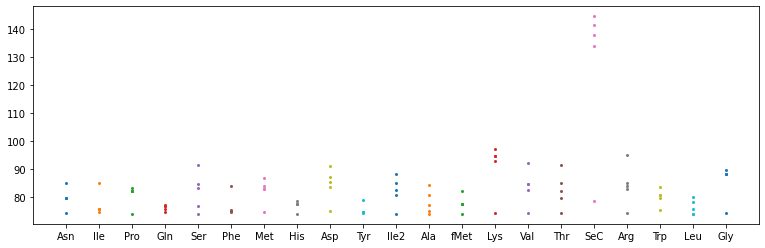

In [107]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

boxWidth = 10
fig = plt.figure(figsize=(13,4))

for x,isotype in enumerate( isotypes ):
    y = list(df_score_summary[isotype])[0:-1]
    x = [50*x+1 for item in range(len(y))]
    
    plt.plot(x,y,marker='o',markersize=2,linewidth=0)

plt.xticks([50*x+1 for x in range(len(isotypes))],isotypes)
plt.show()
    

In [139]:
thr_data = list( df_worthy[df_worthy['isotype'] == 'Thr']['score'] )
ala_data = list( df_worthy[df_worthy['isotype'] == 'Ala']['score'] )
arg_data = list( df_worthy[df_worthy['isotype'] == 'Arg']['score'] )
asp_data = list( df_worthy[df_worthy['isotype'] == 'Asp']['score'] )
gly_data = list( df_worthy[df_worthy['isotype'] == 'Gly']['score'] )
ser_data = list( df_worthy[df_worthy['isotype'] == 'Ser']['score'] )
val_data = list( df_worthy[df_worthy['isotype'] == 'Val']['score'] )

From this basic analysis I am liking the look of Thr. It looks nearly normally distributed and has over 1000 counts!

Wait after actually plotting it, I was lied to! It is distinctly bimodal! Probably one for every isoacceptor.


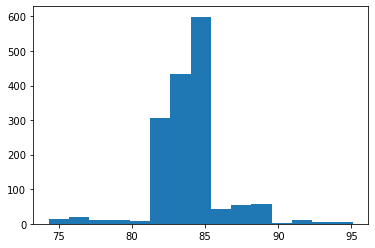

In [146]:
import matplotlib.pyplot as plt

plt.hist(arg_data, bins=15)
plt.show()

Well by the looks of it, Arg or Val might be the best in terms of raw score values and also counts. They both have really high counts, which was one of my criteria for them.

Now I don't know tRNA biology well enough to right off the bat have an opinion on which one is better to create models on, but Arg is always on the tip of my tongue, so I kinda want to go with that (also its distribution is ever so slightly nicer than Val) :)

# Lets see how many replicate Arg there are shall we

In [147]:
df_arg = df_worthy[df_worthy['isotype'] == 'Arg']
df_arg.shape

(1578, 7)

In [151]:
uniqueSeqs = pd.unique(df_arg['sequence'])
len(uniqueSeqs)

133

Wow! look at that! Only 133 unique Arg from this entire set of 1578 tRNAs!!!

This doesn't really make sense because I got 405 genomes, each of which should have 1-2 Arg, and I don't expect them to be so similar that they are literally identical!

In [155]:
'''
with open('for_mafft.fa', 'w') as file:
    for n, element in enumerate(uniqueSeqs):
        fastaLine = f'>{n}\n{element}\n'
        file.write(fastaLine)
'''

"\nwith open('for_mafft.fa', 'w') as file:\n    for n, element in enumerate(uniqueSeqs):\n        fastaLine = f'>{n}\n{element}\n'\n        file.write(fastaLine)\n"

In [156]:
set(df_arg['anticodon'])

{'ACG', 'CCG', 'TCT'}

# TBH this project probably doomed

This may be fun to do, but I literally have 2-5 labelled data points...will that be enough for semi-supervised learning??? I have no idea :)